# Mathematical Underpinnings Lab 9

### Mikołaj Malec

## Task 1 (EM)

### a)

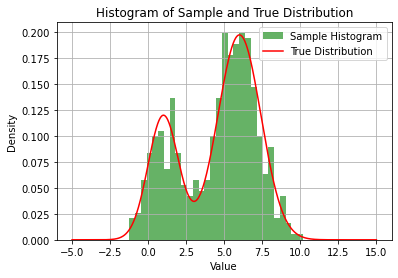

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# True parameter values
mu0 = 1
mu1 = 6
sigma0_sq = 1
sigma1_sq = 2
pi0 = 0.3
pi1 = 0.7

# Number of observations
n = 500

# Generate Z values
Z = np.random.choice([0, 1], size=n, p=[pi0, pi1])

# Generate observations
observations = np.zeros(n)
for i in range(n):
    if Z[i] == 0:
        observations[i] = np.random.normal(mu0, np.sqrt(sigma0_sq))
    else:
        observations[i] = np.random.normal(mu1, np.sqrt(sigma1_sq))

# Plot histogram of the sample
plt.hist(observations, bins=30, density=True, alpha=0.6, color='g', label='Sample Histogram')

# Plot true distribution
x = np.linspace(-5, 15, 1000)
true_distribution = pi0 * np.exp(-(x - mu0)**2 / (2 * sigma0_sq)) / np.sqrt(2 * np.pi * sigma0_sq) + \
                    pi1 * np.exp(-(x - mu1)**2 / (2 * sigma1_sq)) / np.sqrt(2 * np.pi * sigma1_sq)
plt.plot(x, true_distribution, 'r-', label='True Distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Sample and True Distribution')
plt.legend()
plt.grid(True)
plt.show()

### b)

$
\mathcal{L}(\theta) = \sum_{i=1}^{n} \log(p(x_i | G_i = g_i, \theta)*p(G_i=g_i|\theta))
$

### c)

In [2]:
def compute_gamma(x_i, theta):
    # Unpack theta
    mu0, mu1, sigma0_sq, sigma1_sq, pi0, pi1 = theta
    
    # Compute the probability densities for each component
    pdf_0 = pi0 * np.exp(-(x_i - mu0)**2 / (2 * sigma0_sq)) / np.sqrt(2 * np.pi * sigma0_sq)
    pdf_1 = pi1 * np.exp(-(x_i - mu1)**2 / (2 * sigma1_sq)) / np.sqrt(2 * np.pi * sigma1_sq)
    
    # Compute the total probability density
    total_pdf = pdf_0 + pdf_1
    
    # Compute the conditional probabilities of G_i being 0 and 1
    conditional_prob_0 = pdf_0 / total_pdf
    conditional_prob_1 = pdf_1 / total_pdf
    
    # Return the expected value of G_i given x_i and theta
    return conditional_prob_1

# Example usage:
# Assuming x_i is an observed value and theta contains the current parameter estimates
x_i = 3.5  # Example observed value
theta = (1, 6, 1, 2, 0.3, 0.7)  # Example parameter estimates

gamma_i = compute_gamma(x_i, theta)
print("Expected value of G_i=1 given x_i and theta:", gamma_i)

Expected value of G_i=1 given x_i and theta: 0.8872770529880288


### d)

In [3]:
def update_parameters(observations, gamma):
    # Update mean parameters
    mu0_new = np.sum((1 - gamma) * observations) / np.sum(1 - gamma)
    mu1_new = np.sum(gamma * observations) / np.sum(gamma)
    
    # Update variance parameters
    sigma0_sq_new = np.sum((1 - gamma) * (observations - mu0_new)**2) / np.sum(1 - gamma)
    sigma1_sq_new = np.sum(gamma * (observations - mu1_new)**2) / np.sum(gamma)
    
    # Update mixing coefficients
    pi0_new = np.mean(1 - gamma)
    pi1_new = 1 - pi0_new
    
    return mu0_new, mu1_new, sigma0_sq_new, sigma1_sq_new, pi0_new, pi1_new

# Example usage:
# Assuming observations is an array of observed values and gamma contains the expected values of G_i
# Continuing from the previous example, let's say we have:
example = np.array([2.3, 4.5, 6.7, 8.9, 10.1])  # Example observed values
gamma = np.array([0.2, 0.4, 0.6, 0.8, 0.9])  # Example expected values of G_i

# Initial parameter estimates
mu_initial = 3  # Example initial mean estimate
variance_initial = 2  # Example initial variance estimate
pi_initial = 0.5  # Example initial mixing coefficient estimate

# Update parameters
mu_new0, variance_new0, pi_new0, mu_new1, variance_new1, pi_new1 = update_parameters(example, gamma)
print("Updated mean:", mu_new0, mu_new1)
print("Updated variance:", variance_new0, variance_new1)
print("Updated mixing coefficient:", pi_new0, pi_new1)


Updated mean: 4.766666666666667 5.812128418549347
Updated variance: 7.755172413793105 0.41999999999999993
Updated mixing coefficient: 6.0317460317460325 0.5800000000000001


### e)

In [4]:
def initialize_parameters():
    # Initialize mean parameters randomly
    mu0_hat = np.random.uniform(-5, 5)
    mu1_hat = np.random.uniform(-5, 5)
    
    # Initialize variance parameters randomly
    sigma0_hat = np.random.uniform(0.1, 5)
    sigma1_hat = np.random.uniform(0.1, 5)
    
    # Initialize mixing coefficients
    pi0_hat = 0.5
    pi1_hat = 1 - pi0_hat
    
    return mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

def em_algorithm(observations, max_iterations=100, tolerance=1e-4):
    # Initialize parameters
    mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat = initialize_parameters()
    
    for i in range(max_iterations):
        # E-step
        gamma = compute_gamma(observations, (mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat))
        
        # M-step
        mu0_new, mu1_new, sigma0_sq_new, sigma1_sq_new, pi0_new, pi1_new = update_parameters(observations, gamma)
        
        # Check convergence
        if np.abs(mu0_new - mu0_hat) < tolerance and \
           np.abs(mu1_new - mu1_hat) < tolerance and \
           np.abs(sigma0_sq_new - sigma0_hat) < tolerance and \
           np.abs(sigma1_sq_new - sigma1_hat) < tolerance and \
           np.abs(pi0_new - pi0_hat) < tolerance:
            break
        
        # Update parameters
        mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat = mu0_new, mu1_new, sigma0_sq_new, sigma1_sq_new, pi0_new, pi1_new
    
    return mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

# Example usage:
# Assuming observations is an array of observed values
example = np.array([0.5, 1.7, 2.9, 5.2, 7.4, 9.8, 11.0, 13.2])  # Example observed values

# Run EM algorithm
mu0_estimate, mu1_estimate, sigma0_sq_estimate, sigma1_sq_estimate, pi0_estimate, pi1_estimate = em_algorithm(example)

print("Estimated parameters:")
print("mu0:", mu0_estimate)
print("mu1:", mu1_estimate)
print("sigma0^2:", sigma0_sq_estimate)
print("sigma1^2:", sigma1_sq_estimate)
print("pi0:", pi0_estimate)
print("pi1:", pi1_estimate)


Estimated parameters:
mu0: 1.6538158208859262
mu1: 9.062421986965653
sigma0^2: 0.9614245101772312
sigma1^2: 9.205893636782859
pi0: 0.35093267595588823
pi1: 0.6490673240441118


### e)

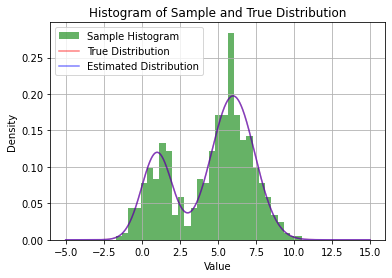

   Parameter  True Value  Estimated Value
0        mu0         1.0         1.015700
1        mu1         6.0         5.994392
2  sigma0_sq         1.0         0.960775
3  sigma1_sq         2.0         2.040239
4        pi0         0.3         0.288117
5        pi1         0.7         0.711883


In [5]:
# Contiune from point a)

# Run EM algorithm
mu0_estimate, mu1_estimate, sigma0_sq_estimate, sigma1_sq_estimate, pi0_estimate, pi1_estimate = em_algorithm(observations)

# Plot histogram of the sample
plt.hist(observations, bins=30, density=True, alpha=0.6, color='g', label='Sample Histogram')

# Plot true distribution
plt.plot(x, true_distribution, 'r-', label='True Distribution', alpha=0.5)

# Plot estimated distribution
x = np.linspace(-5, 15, 1000)
estimated_distribution = pi0_estimate * np.exp(-(x - mu0_estimate)**2 / (2 * sigma0_sq_estimate)) / np.sqrt(2 * np.pi * sigma0_sq_estimate) + \
                    pi1_estimate * np.exp(-(x - mu1_estimate)**2 / (2 * sigma1_sq_estimate)) / np.sqrt(2 * np.pi * sigma1_sq_estimate)
plt.plot(x, true_distribution, 'b-', label='Estimated Distribution', alpha=0.5)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Sample and True Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Print true and estimated parameter values side by side
data = {
    "Parameter": ["mu0", "mu1", "sigma0_sq", "sigma1_sq", "pi0", "pi1"],
    "True Value": [mu0, mu1, sigma0_sq, sigma1_sq, pi0, pi1],
    "Estimated Value": [mu0_estimate, mu1_estimate, sigma0_sq_estimate, sigma1_sq_estimate, pi0_estimate, pi1_estimate]
}
df = pd.DataFrame(data)
print(df)
